In [1]:
#setup kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"biswajit01","key":"aedf99365722bfcb1e5909c8c7b1f10b"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!rm -rf sample_data

In [7]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 4.37MB/s]


In [8]:
!unzip diabetes-dataset.zip -d data

Archive:  diabetes-dataset.zip
  inflating: data/diabetes.csv       


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [10]:
df=pd.read_csv("/content/data/diabetes.csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#calculating total number of nan value counts
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#value specific counts of pregnancies column
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [16]:
palette=sns.color_palette("hls")
sns.set_palette(palette)

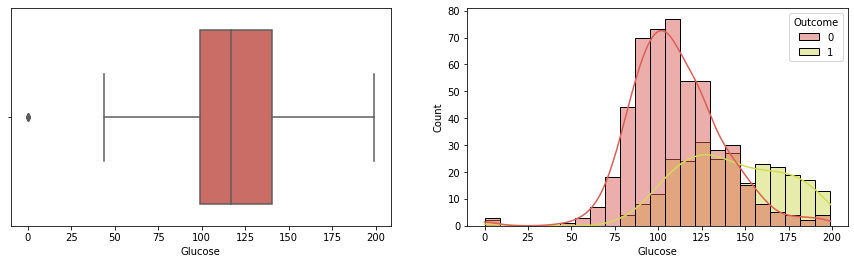

In [17]:
#box plot and histogram plot of glucose column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Glucose', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Glucose",kde=True)

plt.show()

In [18]:
#the data is little bit right skewed and outlier count is low, so we can keep the outlier value

In [19]:
#check the data counts which have glucose value 0
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


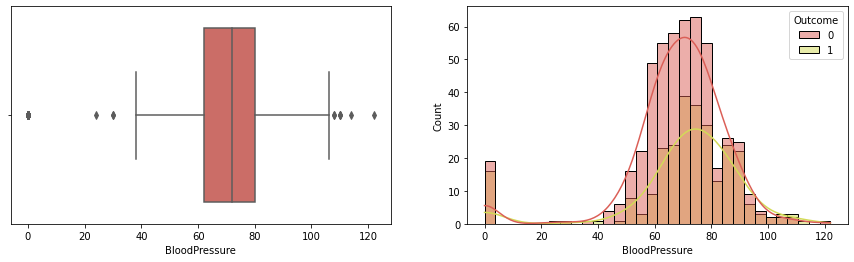

In [20]:
#box plot and histogram plot of bloodPressurw
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BloodPressure', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BloodPressure",kde=True)

plt.show()

In [21]:
#checking the bloodpressure data is skewed or not
df['BloodPressure'].skew()

-1.8436079833551302

In [22]:
#its negative so,its not skewed
#another statistical measure for the bloodpressure column
print("Mean value of bp",df['BloodPressure'].mean())
print("Median value of bp",df['BloodPressure'].median())
print("Standard deviation of bp",df['BloodPressure'].std())
print("Minimum value of bp",df['BloodPressure'].min())
print("Maximum value of bp",df['BloodPressure'].max())

Mean value of bp 69.10546875
Median value of bp 72.0
Standard deviation of bp 19.355807170644777
Minimum value of bp 0
Maximum value of bp 122


In [23]:
#here i used zscore =2 ,above the 2 or below 2 will consider as outlier
# below i added the link from where i got the list of blood pressures 
# https://emoha.com/blogs/health/what-is-normal-bp-range-for-women-and-men

In [24]:
#calculating the upper and lower limit to detect the outliers
upper_limit = df['BloodPressure'].mean() + 2*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 2*df['BloodPressure'].std()
print(upper_limit,lower_limit)

107.81708309128956 30.393854408710446


In [25]:
#count the values which are above the upper and below the lower limit
len(df[(df['BloodPressure'] > upper_limit) | (df['BloodPressure'] < lower_limit)])

45

In [26]:
#its a big number if removed it will be bad for model training, so will modify them

#creating another column in the dataframe to load the modified value of bloodpressure and ploting the values, if any problem occured we will
#drop the new column and treat the outliers again by using original columns value

#blood pressure 0 not possible because BloodPressure 0 means the body is dead
#minimum 60-70 can be consideres as normal blood pressure, so replacing it with the mean of blood pressure
bp_mean=df['BloodPressure'].mean()
df['bloodPressure_modified'] = np.where(
    df['BloodPressure']>upper_limit,
    bp_mean,
    np.where(
        df['BloodPressure']<lower_limit,
        bp_mean,
        df['BloodPressure']
    )
)
df['bloodPressure_modified'].describe()

count    768.000000
mean      72.027013
std       11.170450
min       38.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      106.000000
Name: bloodPressure_modified, dtype: float64

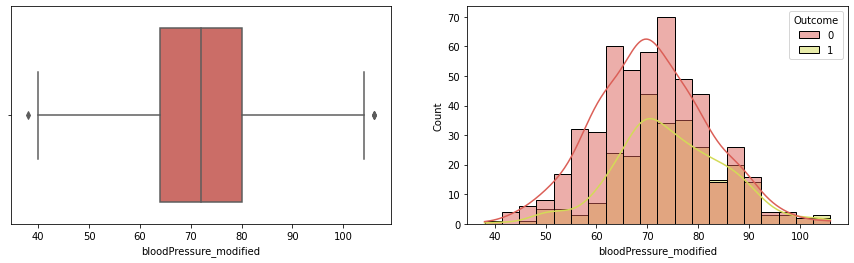

In [27]:
#ploting the bloodpressure modified column to check the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='bloodPressure_modified', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="bloodPressure_modified",kde=True)

plt.show()

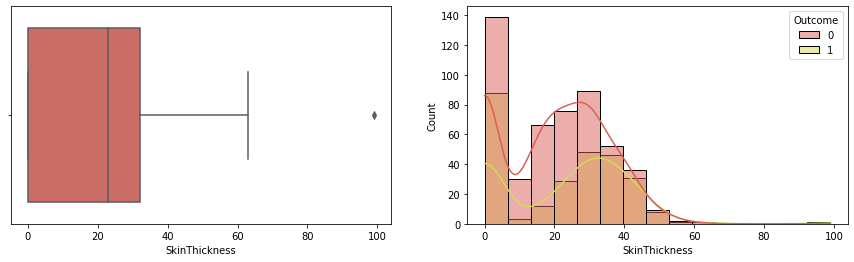

In [28]:
#box plot and histogram plot of bloodPressurw
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='SkinThickness', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="SkinThickness",kde=True)

plt.show()

In [29]:
#checking skinthickness column is skewed or not
df['SkinThickness'].skew()

0.10937249648187608

In [30]:
# will use iqr technique to remove the outlier

df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [31]:
# reference url of skin thickness : https://www.medicalnewstoday.com/articles/thin-skin-vs-thick-skin#thin-skin
#considering the skin thickness is the value of  epedermis(Which is the first layer of skin in human) thickness in micrometer unit (μm)
# also considering the 0 value as null values

In [32]:
#statistical info of insulin
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

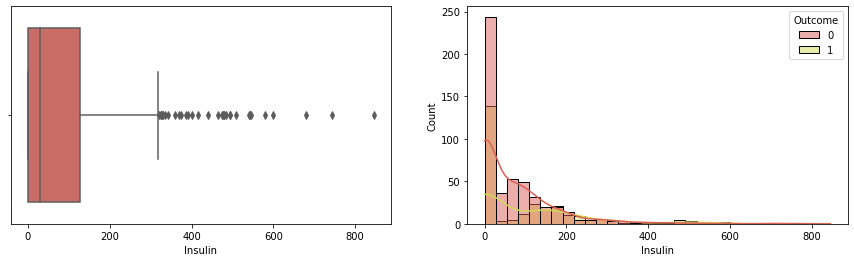

In [33]:
#ploting the visualization of insulin 
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Insulin",kde=True)

plt.show()

In [34]:
#its right skewed, so we can use iqr to remove the outlier
percentile25 = df['Insulin'].quantile(0.25)
percentile75 = df['Insulin'].quantile(0.75)

iqr = percentile75 - percentile25

upper_insulin_limit = percentile75 + 1.5 * iqr
lower_insulin_limit = percentile25 - 1.5 * iqr

print("percentile25 ",percentile25)
print("percentile75 ",percentile75)
print("iqr ",iqr)
print("upper_limit ",upper_insulin_limit)
print("lower limit ",lower_insulin_limit)

percentile25  0.0
percentile75  127.25
iqr  127.25
upper_limit  318.125
lower limit  -190.875


In [35]:
#listing the data points which are above upper and below lower insulin
df[(df['Insulin'] > upper_insulin_limit) | (df['Insulin'] < lower_insulin_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodPressure_modified
8,2,197,70,45,543,30.5,0.158,53,1,70.0
13,1,189,60,23,846,30.1,0.398,59,1,60.0
54,7,150,66,42,342,34.7,0.718,42,0,66.0
111,8,155,62,26,495,34.0,0.543,46,1,62.0
139,5,105,72,29,325,36.9,0.159,28,0,72.0
153,1,153,82,42,485,40.6,0.687,23,0,82.0
186,8,181,68,36,495,30.1,0.615,60,1,68.0
220,0,177,60,29,478,34.6,1.072,21,1,60.0
228,4,197,70,39,744,36.7,2.329,31,0,70.0
231,6,134,80,37,370,46.2,0.238,46,1,80.0


In [36]:
df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodPressure_modified
0,6,148,72,35,0,33.6,0.627,50,1,72.000000
1,1,85,66,29,0,26.6,0.351,31,0,66.000000
2,8,183,64,0,0,23.3,0.672,32,1,64.000000
5,5,116,74,0,0,25.6,0.201,30,0,74.000000
7,10,115,0,0,0,35.3,0.134,29,0,69.105469
...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1,74.000000
762,9,89,62,0,0,22.5,0.142,33,0,62.000000
764,2,122,70,27,0,36.8,0.340,27,0,70.000000
766,1,126,60,0,0,30.1,0.349,47,1,60.000000


In [37]:
#replacing the insulin values which are greater than upper limit
df['insulin_modified'] = np.where(df['Insulin']>upper_insulin_limit,upper_insulin_limit,df['Insulin'])
df['insulin_modified'].describe()

count    768.000000
mean      73.652669
std       93.576029
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      318.125000
Name: insulin_modified, dtype: float64

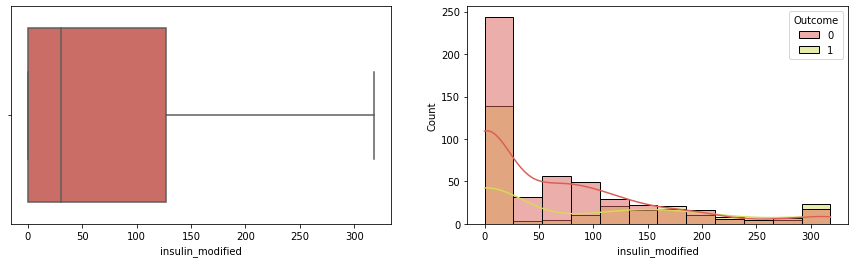

In [38]:
#ploting the visualization of insulin after replacing the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='insulin_modified', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="insulin_modified",kde=True)

plt.show()

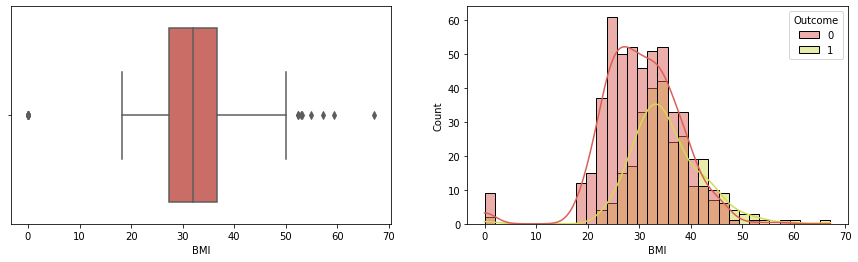

In [39]:
#visulaizing body mass index
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BMI', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BMI",kde=True)

plt.show()

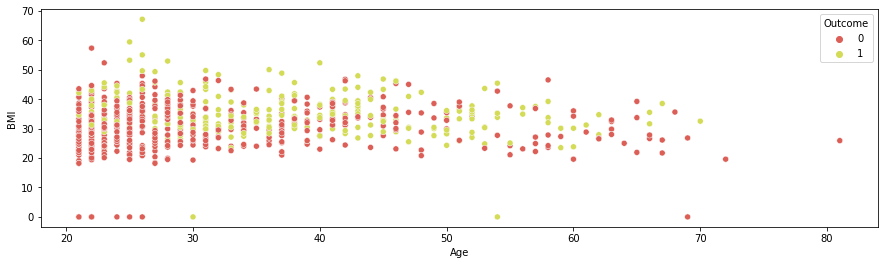

In [40]:
#ploting bmi and age
fig = plt.figure(figsize=[15,4])

sns.scatterplot(data=df, x="Age", y="BMI",  hue="Outcome")

plt.show()

In [41]:
df['BMI'].skew()

-0.42898158845356543

In [42]:
#its negative so,its not skewed
#another statistical measure for the BMI column
print("Mean value of BMI",df['BMI'].mean())
print("Median value of BMI",df['BMI'].median())
print("Standard deviation of BMI",df['BMI'].std())
print("Minimum value of BMI",df['BMI'].min())
print("Maximum value of BMI",df['BMI'].max())

Mean value of BMI 31.992578124999998
Median value of BMI 32.0
Standard deviation of BMI 7.884160320375446
Minimum value of BMI 0.0
Maximum value of BMI 67.1


In [43]:
# used zscore =2 ,above the 2 or below 2 will consider as outlier
#calculating the upper and lower limit to detect the outliers
upper_bmi_limit = df['BMI'].mean() + 3*df['BMI'].std()
lower_bmi_limit = df['BMI'].mean() - 3*df['BMI'].std()
print(upper_bmi_limit,lower_bmi_limit)

55.64505908612634 8.340097163873661


In [44]:
#listing the data points which are above upper and below lower BMI
df[(df['BMI'] > upper_bmi_limit) | (df['BMI'] < lower_bmi_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodPressure_modified,insulin_modified
9,8,125,96,0,0,0.0,0.232,54,1,96.000000,0.0
49,7,105,0,0,0,0.0,0.305,24,0,69.105469,0.0
60,2,84,0,0,0,0.0,0.304,21,0,69.105469,0.0
81,2,74,0,0,0,0.0,0.102,22,0,69.105469,0.0
145,0,102,75,23,0,0.0,0.572,21,0,75.000000,0.0
177,0,129,110,46,130,67.1,0.319,26,1,69.105469,130.0
371,0,118,64,23,89,0.0,1.731,21,0,64.000000,89.0
426,0,94,0,0,0,0.0,0.256,25,0,69.105469,0.0
445,0,180,78,63,14,59.4,2.420,25,1,78.000000,14.0
494,3,80,0,0,0,0.0,0.174,22,0,69.105469,0.0


In [45]:
#https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf
#according to the health report BMI
# <18.5  underweight
# 18.5—24.9	Healthy Weight
# 25.0—29.9	Overweight
# 30.0 and Above	Obesity
# so replacing the outliers with lower and upper limit values 
df['bmi_modified'] = np.where(
    df['BMI']>upper_bmi_limit,
    upper_bmi_limit,
    np.where(
        df['BMI']<lower_bmi_limit,
        lower_bmi_limit,
        df['BMI']
    )
)
df['bmi_modified'].describe()


count    768.000000
mean      32.090073
std        7.366246
min        8.340097
25%       27.300000
50%       32.000000
75%       36.600000
max       55.645059
Name: bmi_modified, dtype: float64

In [46]:
# diabetes pedigree function determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes
# so, the column contain the values of risk, so keeping the column as it is

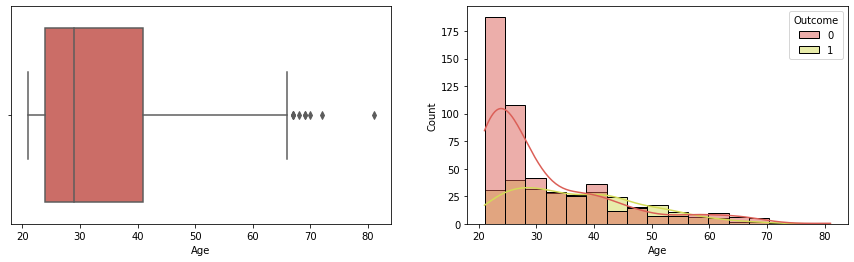

In [47]:
#visulaizing body mass index
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='Age', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="Age",kde=True)

plt.show()

In [48]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodPressure_modified,insulin_modified,bmi_modified
0,6,148,72,35,0,33.6,0.627,50,1,72.0,0.0,33.6
1,1,85,66,29,0,26.6,0.351,31,0,66.0,0.0,26.6
2,8,183,64,0,0,23.3,0.672,32,1,64.0,0.0,23.3


In [49]:
#droping some old columns which are not needed for the training
df=df.drop(['BloodPressure','Insulin','BMI'],axis=1)

In [50]:
df.head()

,Pregnancies,Glucose,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,bloodPressure_modified,insulin_modified,bmi_modified
0,6,148,35,0.627,50,1,72.0,0.0,33.6
1,1,85,29,0.351,31,0,66.0,0.0,26.6
2,8,183,0,0.672,32,1,64.0,0.0,23.3
3,1,89,23,0.167,21,0,66.0,94.0,28.1
4,0,137,35,2.288,33,1,40.0,168.0,43.1


In [51]:
#separating the independent and dependent columns
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [52]:
y.unique()

array([1, 0])

In [53]:
#spliting train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree')

In [58]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4)

In [60]:
from sklearn import metrics

In [61]:
y_kn_pred=kn.predict(x_test)
metrics.accuracy_score(y_test, y_kn_pred)

0.7532467532467533

In [62]:
print(metrics.classification_report(y_test,y_kn_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       100
           1       0.77      0.43      0.55        54

    accuracy                           0.75       154
   macro avg       0.76      0.68      0.69       154
weighted avg       0.76      0.75      0.73       154



In [63]:
metrics.confusion_matrix(y_test, y_kn_pred)

array([[93,  7],
       [31, 23]])